<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/NYC_Taxi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# **Import libraries**

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Reading Files into Python**

In [286]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')
#df = df.sample(frac=0.1, random_state=42)

In [287]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682


In [288]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
347690,id0864995,2,2016-02-21 21:48:06,2016-02-21 21:50:03,2,-73.984520,40.744530,-73.987892,40.746151,N,117
215818,id0110861,1,2016-03-28 19:25:04,2016-03-28 19:45:34,1,-73.996201,40.724052,-73.989212,40.665672,N,1230
276132,id0053657,1,2016-02-17 00:50:50,2016-02-17 01:10:41,1,-73.997192,40.722336,-73.941277,40.804939,N,1191
39652,id1299164,1,2016-04-09 14:36:29,2016-04-09 14:44:51,1,-73.965828,40.772163,-73.981155,40.778477,N,502
723828,id2012084,2,2016-03-06 10:14:46,2016-03-06 10:19:45,1,-74.002335,40.729580,-73.991203,40.732834,N,299


In [289]:
df.shape

(72932, 11)

In [290]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# **Variable Identification and Typecasting**

In [291]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


# **Integer Data Type**

In [292]:
df.dtypes[df.dtypes == 'int64']

,0
vendor_id,int64
passenger_count,int64
trip_duration,int64


**Summary:**
- **vendor_id** are a unique number assigned to customers therefore it is **Ok to be integer**.
- **passenger_count** shows the number of passanger in each trips and it's **OK to be integer.**
- **trip_duration** indicates length of each trip so it's **OK to be integer.**

# **Float Data Type**

In [293]:
df.dtypes[df.dtypes == 'float64']

,0
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64


**Summary:**
- **pickup_longitude** is expected to be a float number so it **should not be changed.**
- **pickup_latitude** is expected to be a float number therefore **we do not need to change it.**
- **dropoff_longitude** is expected to be a float number so it **should not be changed.**
- **dropoff_latitude** is expected to be a float number therefore **we do not need to change it.**

In [294]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


*    **variables like 'pickup_datetime'** and **'dropoff_datetime' has  object type**. This means that **Pandas was not able to recognize the datatype** of these three variables.

In [295]:
df[['pickup_datetime',  'dropoff_datetime' , 'store_and_fwd_flag' ]].head()

,pickup_datetime,dropoff_datetime,store_and_fwd_flag
469114,2016-05-21 10:40:14,2016-05-21 10:51:11,N
694852,2016-01-08 18:49:27,2016-01-08 18:52:42,N
696324,2016-05-22 00:54:10,2016-05-22 01:08:10,N
356496,2016-06-11 10:32:12,2016-06-11 10:38:50,N
645318,2016-04-03 10:45:51,2016-04-03 10:57:13,N


In [296]:
df['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,72535
Y,397


- **'pickup_datetime'** and **'dropoff_datetime'** should be a datetime variable.


In [297]:
# Convert date field to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [298]:
# last day of year
df['doy_pickup_datetime'] = df['pickup_datetime'].dt.dayofyear
df['doy_dropoff_datetime'] = df['dropoff_datetime'].dt.dayofyear

# week of year
#df['woy_pickup_datetime'] = df['pickup_datetime'].dt.isocalendar
#df['woy_dropoff_datetime'] = df['dropoff_datetime'].dt.isocalendar

# month of year
df['moy_pickup_datetime'] = df['pickup_datetime'].dt.month
df['moy_dropoff_datetime'] = df['dropoff_datetime'].dt.month

# day of week
df['dow_pickup_datetime'] = df['pickup_datetime'].dt.dayofweek
df['dow_dropoff_datetime'] = df['dropoff_datetime'].dt.dayofweek

In [299]:
df['hour_pickup_datetime'] = df['pickup_datetime'].dt.hour
df['hour_dropoff_datetime'] = df['dropoff_datetime'].dt.hour

In [300]:
# checking new extracted columns using datetime
df[['pickup_datetime','doy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime', 'hour_pickup_datetime']].head()

,pickup_datetime,doy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,hour_pickup_datetime
469114,2016-05-21 10:40:14,142,5,5,10
694852,2016-01-08 18:49:27,8,1,4,18
696324,2016-05-22 00:54:10,143,5,6,0
356496,2016-06-11 10:32:12,163,6,5,10
645318,2016-04-03 10:45:51,94,4,6,10


In [301]:
df[['dropoff_datetime', 'doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime', 'hour_pickup_datetime']].head()

,dropoff_datetime,doy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,hour_pickup_datetime
469114,2016-05-21 10:51:11,142,5,5,10
694852,2016-01-08 18:52:42,8,1,4,18
696324,2016-05-22 01:08:10,143,5,6,0
356496,2016-06-11 10:38:50,163,6,5,10
645318,2016-04-03 10:57:13,94,4,6,10


In [302]:
import pandas as pd

# Assuming df is your DataFrame and df['hour_pickup_datetime'] contains the hour of the day (0-23)
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['pickup_time_of_day'] = df['hour_pickup_datetime'].apply(categorize_time_of_day)

# Display the updated DataFrame
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,doy_pickup_datetime,doy_dropoff_datetime,moy_pickup_datetime,moy_dropoff_datetime,dow_pickup_datetime,dow_dropoff_datetime,hour_pickup_datetime,hour_dropoff_datetime,pickup_time_of_day
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,142,142,5,5,5,5,10,10,Morning
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,8,8,1,1,4,4,18,18,Evening
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,143,143,5,5,6,6,0,1,Night
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,163,163,6,6,5,5,10,10,Morning
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,94,94,4,4,6,6,10,10,Morning


In [303]:
import pandas as pd

def convert_to_day_of_week(df, column_name):
    """
    Converts a datetime column to the corresponding day of the week in string format.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime column.
    column_name (str): The name of the datetime column to convert.

    Returns:
    pd.Series: A Series containing the day of the week corresponding to each datetime.
    """
    # Convert the column to datetime if it's not already
    df[column_name] = pd.to_datetime(df[column_name])

    # Create a new column with the day of the week
    df['day_of_week'] = df[column_name].dt.day_name()

    return df['day_of_week']

# Assuming df is your DataFrame
df['pickup_day_of_week'] = convert_to_day_of_week(df, 'pickup_datetime')

In [304]:
import pandas as pd

def convert_to_month_name(df, column_name):
    """
    Converts a datetime column to the corresponding month name in string format.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime column.
    column_name (str): The name of the datetime column to convert.

    Returns:
    pd.Series: A Series containing the month name corresponding to each datetime.
    """
    # Convert the column to datetime if it's not already
    df[column_name] = pd.to_datetime(df[column_name])

    # Create a new column with the month name
    df['month_name'] = df[column_name].dt.month_name()

    return df['month_name']

# Assuming df is your DataFrame
df['pickup_month_name'] = convert_to_month_name(df, 'pickup_datetime')

In [305]:
df[['hour_pickup_datetime', 'hour_pickup_datetime', 'trip_duration']].head()

,hour_pickup_datetime,hour_pickup_datetime,trip_duration
469114,10,10,657
694852,18,18,195
696324,0,0,840
356496,10,10,398
645318,10,10,682


In [306]:
# Numerical datatypes
df.select_dtypes(include=['int64', 'int32','float64','Int64']).dtypes

,0
vendor_id,int64
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
trip_duration,int64
doy_pickup_datetime,int32
doy_dropoff_datetime,int32
moy_pickup_datetime,int32


In [307]:
# seggregating variables into groups
ride_details = ['vendor_id', 'passenger_count', 'trip_duration']
pickuptime = ['doy_pickup_datetime',  'moy_pickup_datetime', 'dow_pickup_datetime', 'hour_pickup_datetime']
dropofftime = ['dropoff_datetime', 'doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime', 'hour_pickup_datetime']
coordinates = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def UVA_numeric(data, var_group):
    """
    This function takes a dataframe and a variable group as arguments
    and converts the variable group to numeric.
    It then calculates the descriptives of the variable.
    """
    size = len(var_group)
    cols = 3  # Number of columns per row
    rows = (size // cols) + (size % cols > 0)  # Calculate number of rows needed

    plt.figure(figsize=(7*cols, 5*rows), dpi=100)

    for j, i in enumerate(var_group):
        # Check if the column exists in the DataFrame
        if i not in data.columns:
            print(f"Column '{i}' not found in the DataFrame.")
            continue

        try:
            # Attempt to convert the column to numeric
            data[i] = pd.to_numeric(data[i], errors='coerce')
        except TypeError as e:
            # Handle TypeError, print the original exception and problematic value
            print(f"Error converting column '{i}': {e}")
            problematic_value = data[i].iloc[0]  # Get the first problematic value
            print(f"Problematic value: {problematic_value}, Type: {type(problematic_value)}")
            continue

        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.kdeplot(data[i], shade=True)

        # Plotting standard deviation, min/max, mean, and median using lines
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.axvline(x=mini, color='orange', linestyle='-', label="min/max")
        plt.axvline(x=maxi, color='orange', linestyle='-')
        plt.axvline(x=mean, color='red', linestyle='-', label="mean")
        plt.axvline(x=median, color='blue', linestyle='-', label="median")

        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

        plt.legend(loc='upper right')  # Place the legend in the upper right corner

    plt.tight_layout()
    plt.show()

**Rides Details**

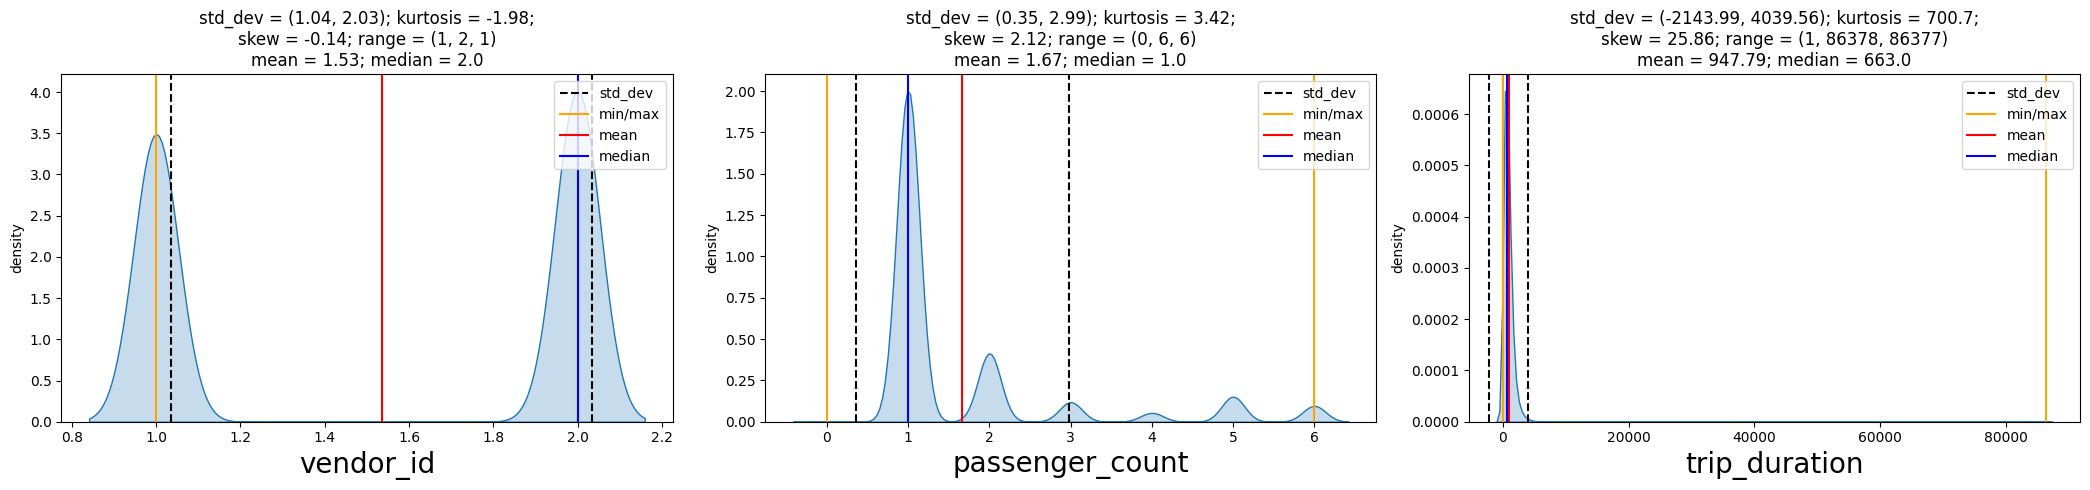

In [311]:
UVA_numeric(df,ride_details)

**Summary of Rides:**

**Pickup Time**

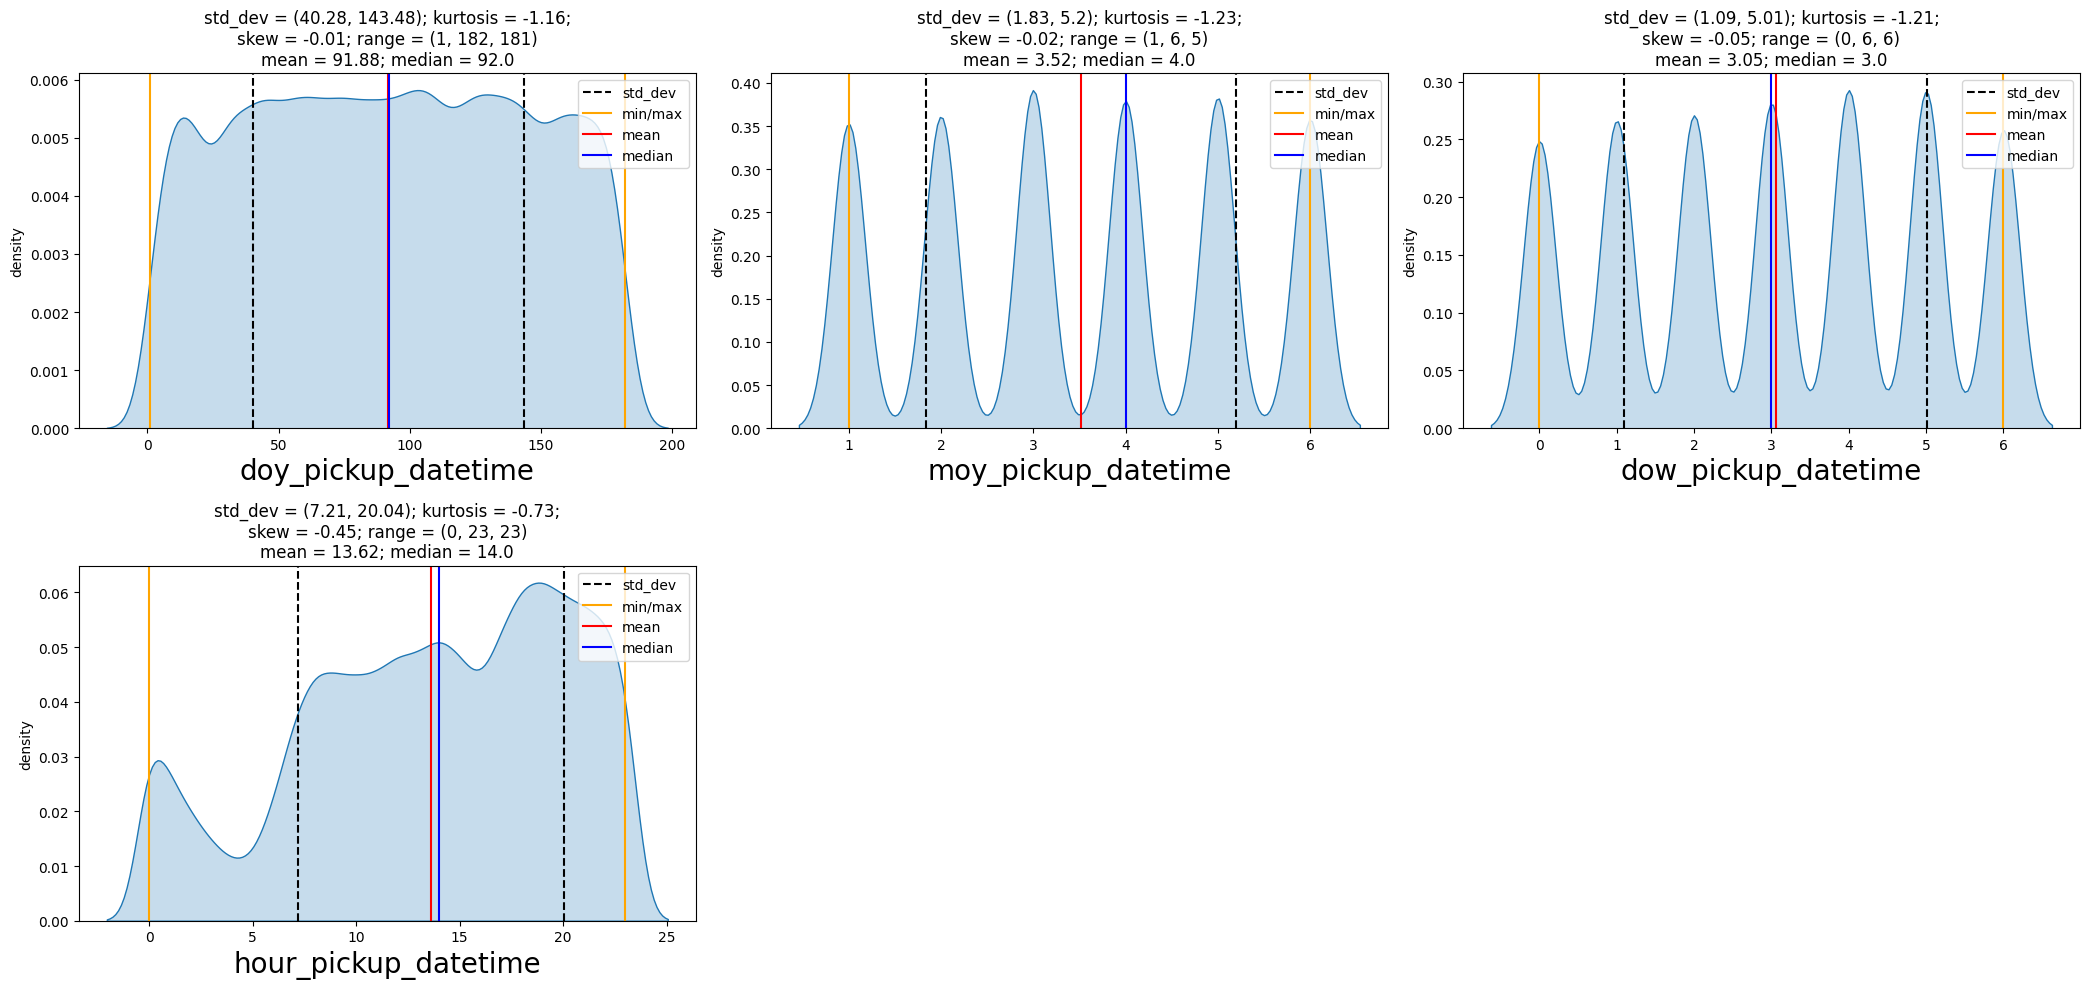

In [312]:
UVA_numeric(df,pickuptime)

**Summary of pickup time**

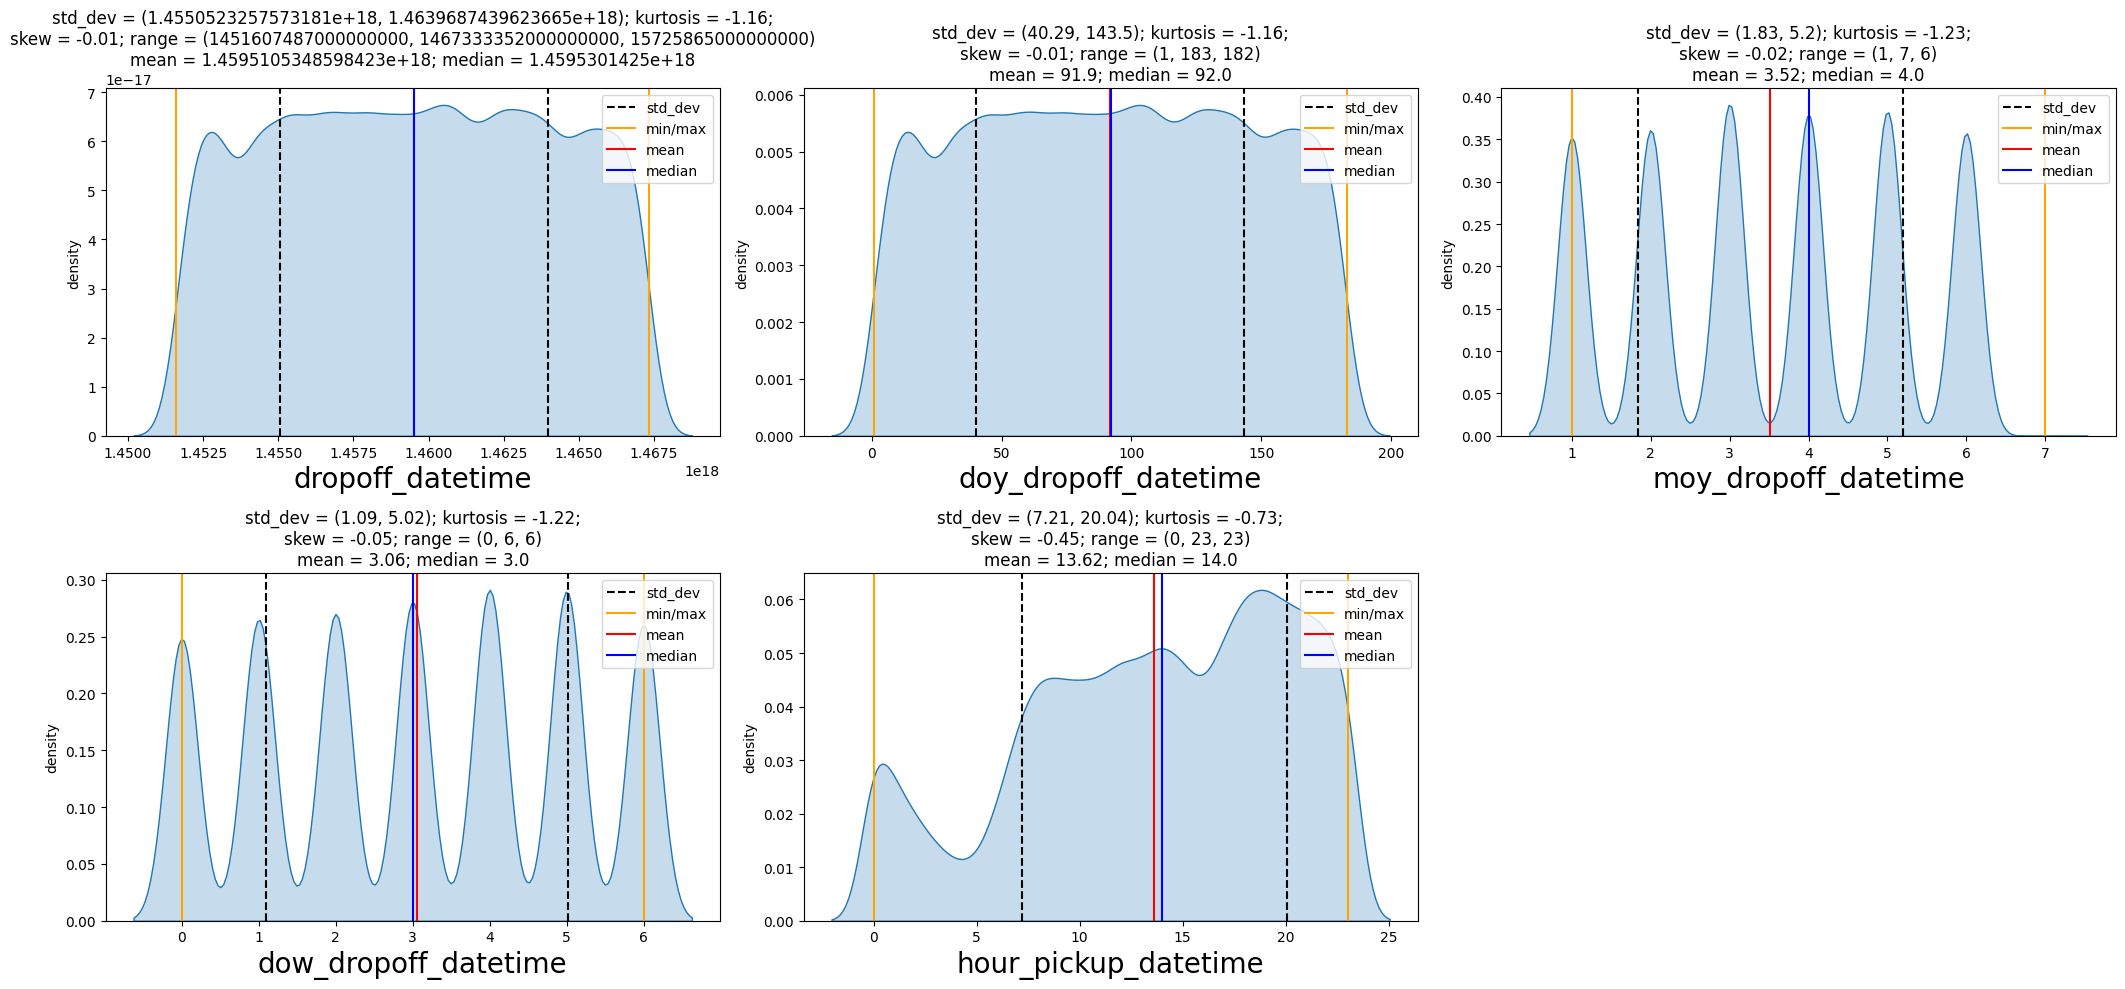

In [313]:
UVA_numeric(df,dropofftime)

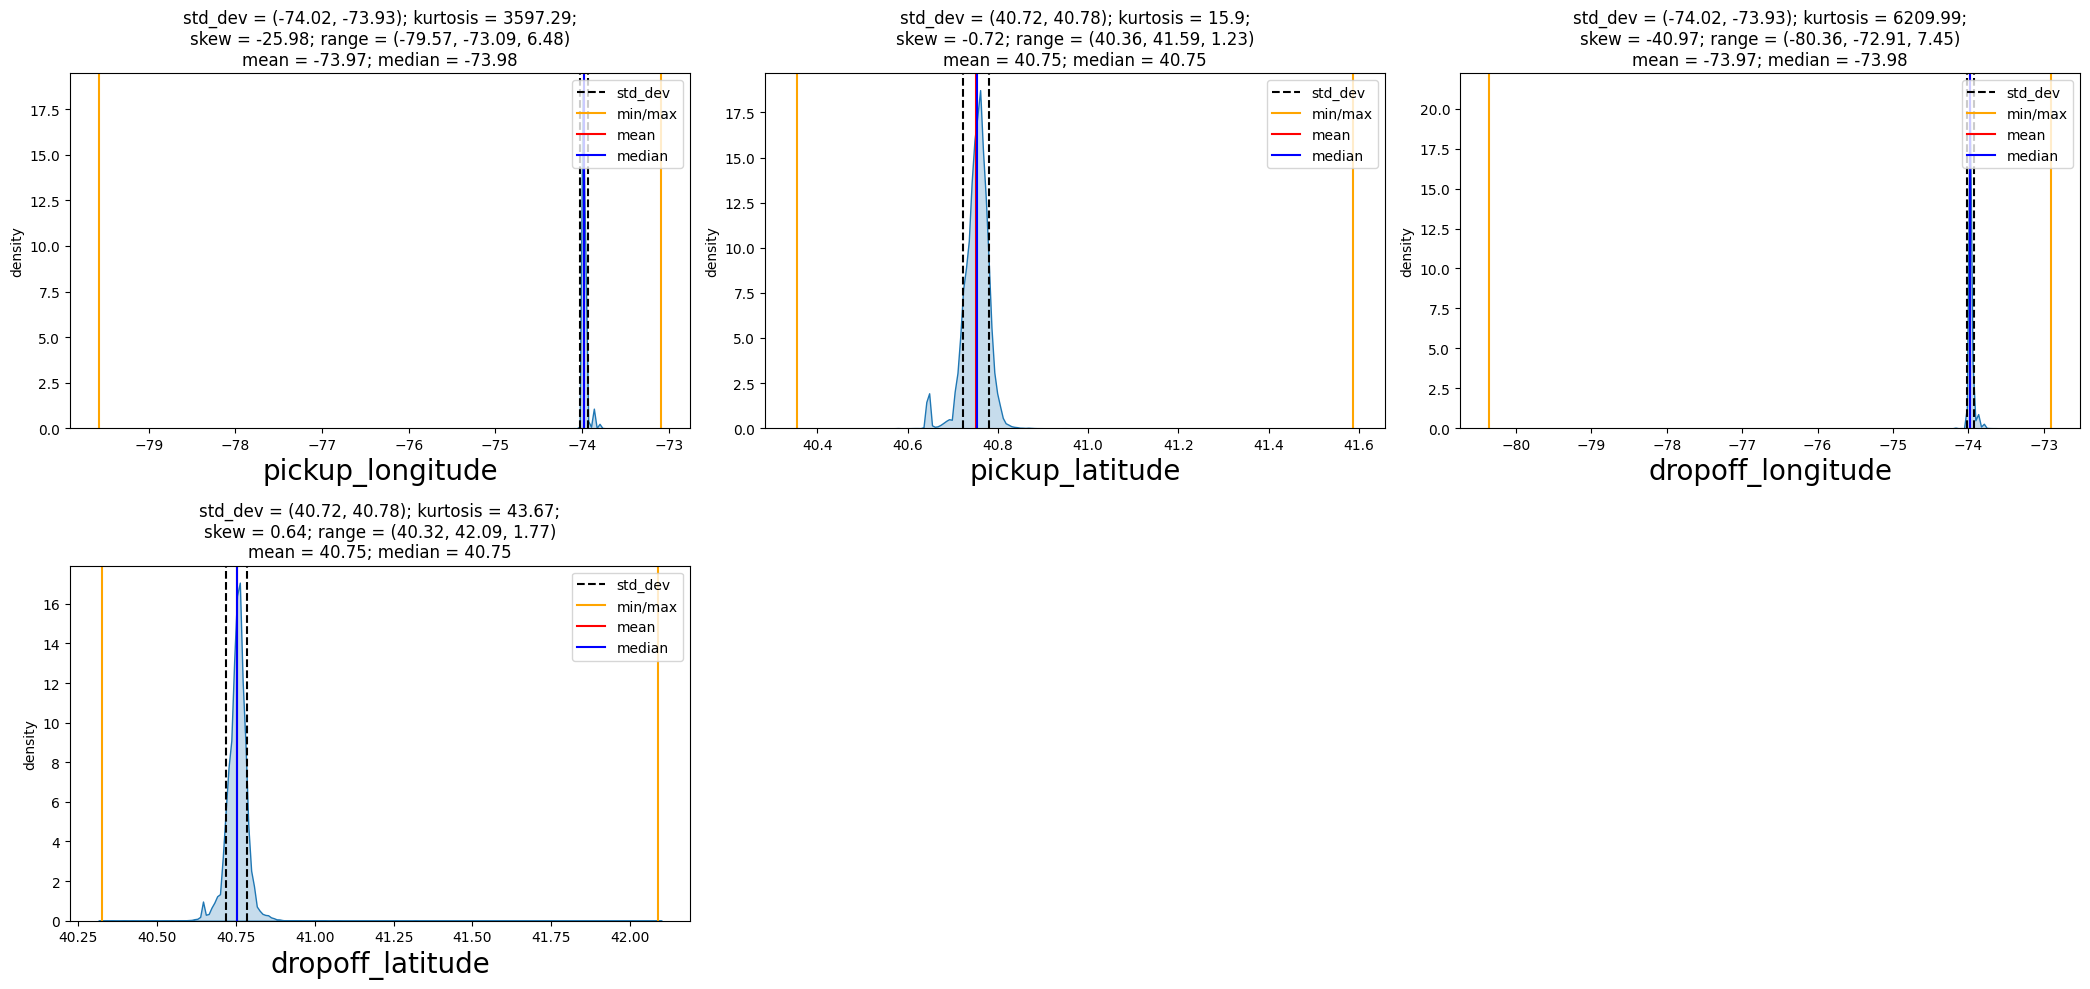

In [331]:
UVA_numeric(df,coordinates)

# **Summary**

## Univariate Analysis : Categorical Varibales

In [314]:
df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

,0
id,object
pickup_datetime,datetime64[ns]
store_and_fwd_flag,object
doy_pickup_datetime,int32
doy_dropoff_datetime,int32
moy_pickup_datetime,int32
moy_dropoff_datetime,int32
dow_pickup_datetime,int32
dow_dropoff_datetime,int32
hour_pickup_datetime,int32


**Grouping Variables**

**- Rides_info:** passenger_count

**- pick_up:** moy_pickup_datetime, dow_pickup_datetime, pickup_time_of_day

**- drop_off:** moy_dropoff_datetime, dow_dropoff_datetime

In [315]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x = norm_count, y = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

Rides_info

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom function for easy visualization of Categorical Variables using countplot
def UVA_category(data, var_group):
    '''
    countplot_category
    takes a group of variables (category) and plots count plots for each variable.
    '''
    # Setting figure_size
    size = len(var_group)
    plt.figure(figsize=(7 * size, 5), dpi=100)

    # For every variable
    for j, i in enumerate(var_group):
        plt.subplot(1, size, j + 1)
        line = sns.countplot(x=data[i])
        line.set_ylabel("Count", fontsize=15)
        line.set_xlabel(f"{i}", fontsize=15)
        line.set_title(f'{i} Count', fontsize=20)

    plt.tight_layout()  # Adjusts the layout so that everything fits without overlap
    plt.show()  # Displays the plots


In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def UVA_category(data, var_group):
    '''
    countplot_category
    takes a group of variables (category) and plots colorful count plots for each variable.
    '''

    size = len(var_group)
    plt.figure(figsize=(7 * size, 5), dpi=100)

    # For every variable
    for j, i in enumerate(var_group):
        plt.subplot(1, size, j + 1)
        # Use the 'viridis' palette for vibrant colors
        line = sns.countplot(x=data[i], palette='viridis')
        line.set_ylabel("Count", fontsize=15)
        line.set_xlabel(f"{i}", fontsize=15)
        line.set_title(f'{i} Count', fontsize=20)

    plt.tight_layout()
    plt.show()


In [325]:
Rides = ['passenger_count', 'store_and_fwd_flag']
pickup = [ 'pickup_month_name', 'pickup_day_of_week', 'pickup_time_of_day']
dropoff = ['moy_dropoff_datetime', 'dow_dropoff_datetime']

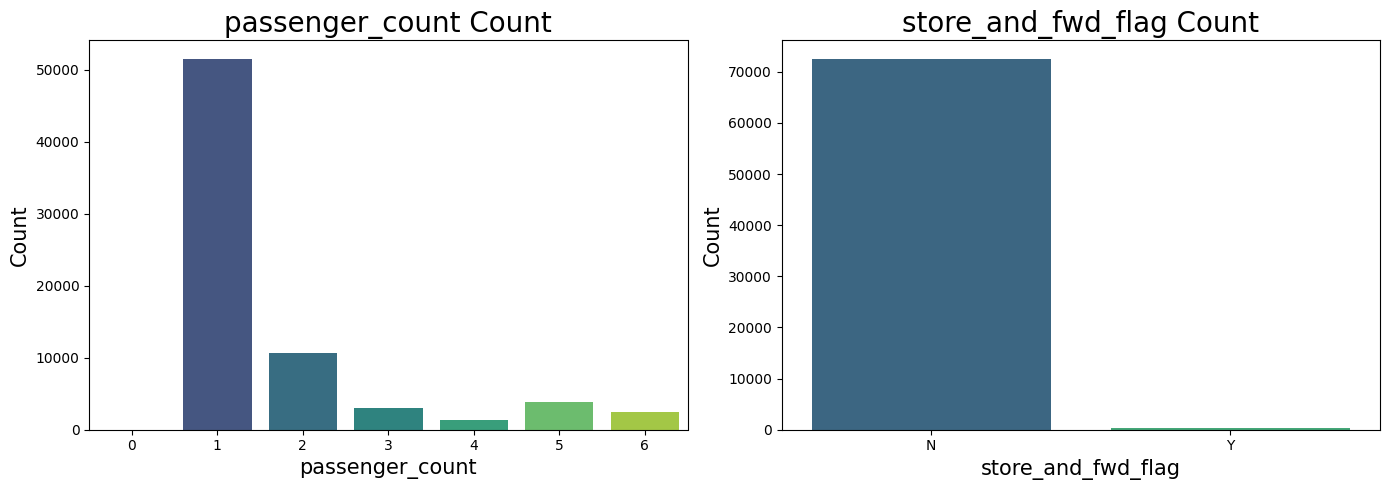

In [326]:
UVA_category(df, Rides)

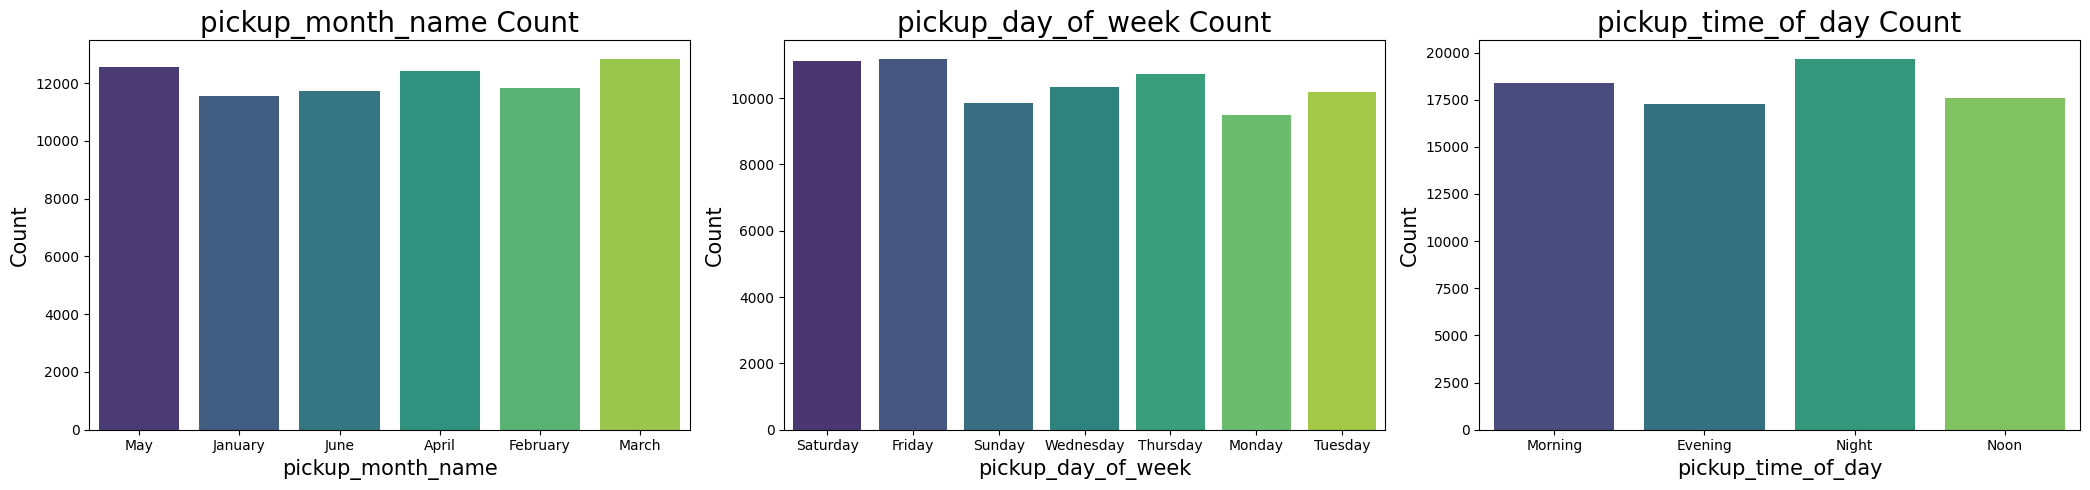

In [320]:
UVA_category(df, pickup)

**Univariate: Missing Values**

In [321]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


**Univariate Analysis: Outliers**

In [323]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


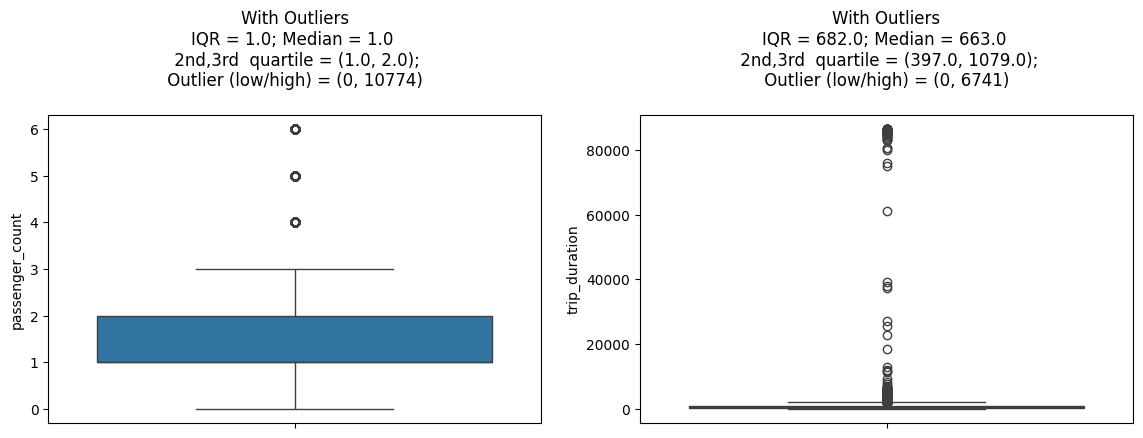

In [324]:
UVA_outlier(df, ['passenger_count', 'trip_duration'])

**Bivariate Analysis : Numerical-Numerical**

In [328]:
numerical = df.select_dtypes(include=['int32', 'int64','float64','Int64'])[:]
numerical.dtypes

,0
vendor_id,int64
dropoff_datetime,int64
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
trip_duration,int64
doy_pickup_datetime,int32
doy_dropoff_datetime,int32


**Correlation Matrix**

In [329]:
correlation = numerical.dropna().corr()
correlation

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_pickup_datetime,doy_dropoff_datetime,moy_pickup_datetime,moy_dropoff_datetime,dow_pickup_datetime,dow_dropoff_datetime,hour_pickup_datetime,hour_dropoff_datetime
vendor_id,1.000000,-0.006006,0.289249,0.018574,-0.002048,0.004797,0.002265,0.035242,-0.006076,-0.006043,-0.005015,-0.005051,0.004441,0.004045,0.008810,0.006844
dropoff_datetime,-0.006006,1.000000,-0.003843,0.002284,-0.002268,0.001467,-0.000343,0.012450,0.999986,0.999986,0.985725,0.985726,-0.010556,-0.010392,-0.001781,-0.002671
passenger_count,0.289249,-0.003843,1.000000,-0.000246,-0.002726,-0.003424,-0.004928,0.011667,-0.003937,-0.003924,-0.003959,-0.003971,0.022989,0.022832,0.016461,0.015588
pickup_longitude,0.018574,0.002284,-0.000246,1.000000,-0.179113,0.463806,-0.031845,0.064941,0.002131,0.002177,0.002438,0.002473,-0.023207,-0.025766,0.021016,0.020533
pickup_latitude,-0.002048,-0.002268,-0.002726,-0.179113,1.000000,-0.011880,0.439916,-0.057618,-0.002307,-0.002387,-0.001323,-0.001326,-0.034955,-0.034660,0.015185,0.022444
dropoff_longitude,0.004797,0.001467,-0.003424,0.463806,-0.011880,1.000000,0.040833,0.040039,0.001608,0.001647,0.000677,0.000714,-0.005097,-0.006278,-0.032575,-0.034152
dropoff_latitude,0.002265,-0.000343,-0.004928,-0.031845,0.439916,0.040833,1.000000,-0.044240,-0.000428,-0.000490,-0.000187,-0.000311,-0.025508,-0.025725,0.022215,0.027860
trip_duration,0.035242,0.012450,0.011667,0.064941,-0.057618,0.040039,-0.044240,1.000000,0.011726,0.012434,0.012140,0.012827,-0.004692,-0.006089,0.005733,0.003143
doy_pickup_datetime,-0.006076,0.999986,-0.003937,0.002131,-0.002307,0.001608,-0.000428,0.011726,1.000000,0.999998,0.985729,0.985727,-0.010131,-0.009985,-0.006967,-0.007508
doy_dropoff_datetime,-0.006043,0.999986,-0.003924,0.002177,-0.002387,0.001647,-0.000490,0.012434,0.999998,1.000000,0.985728,0.985730,-0.010104,-0.009918,-0.006682,-0.007924


**Heatmap**

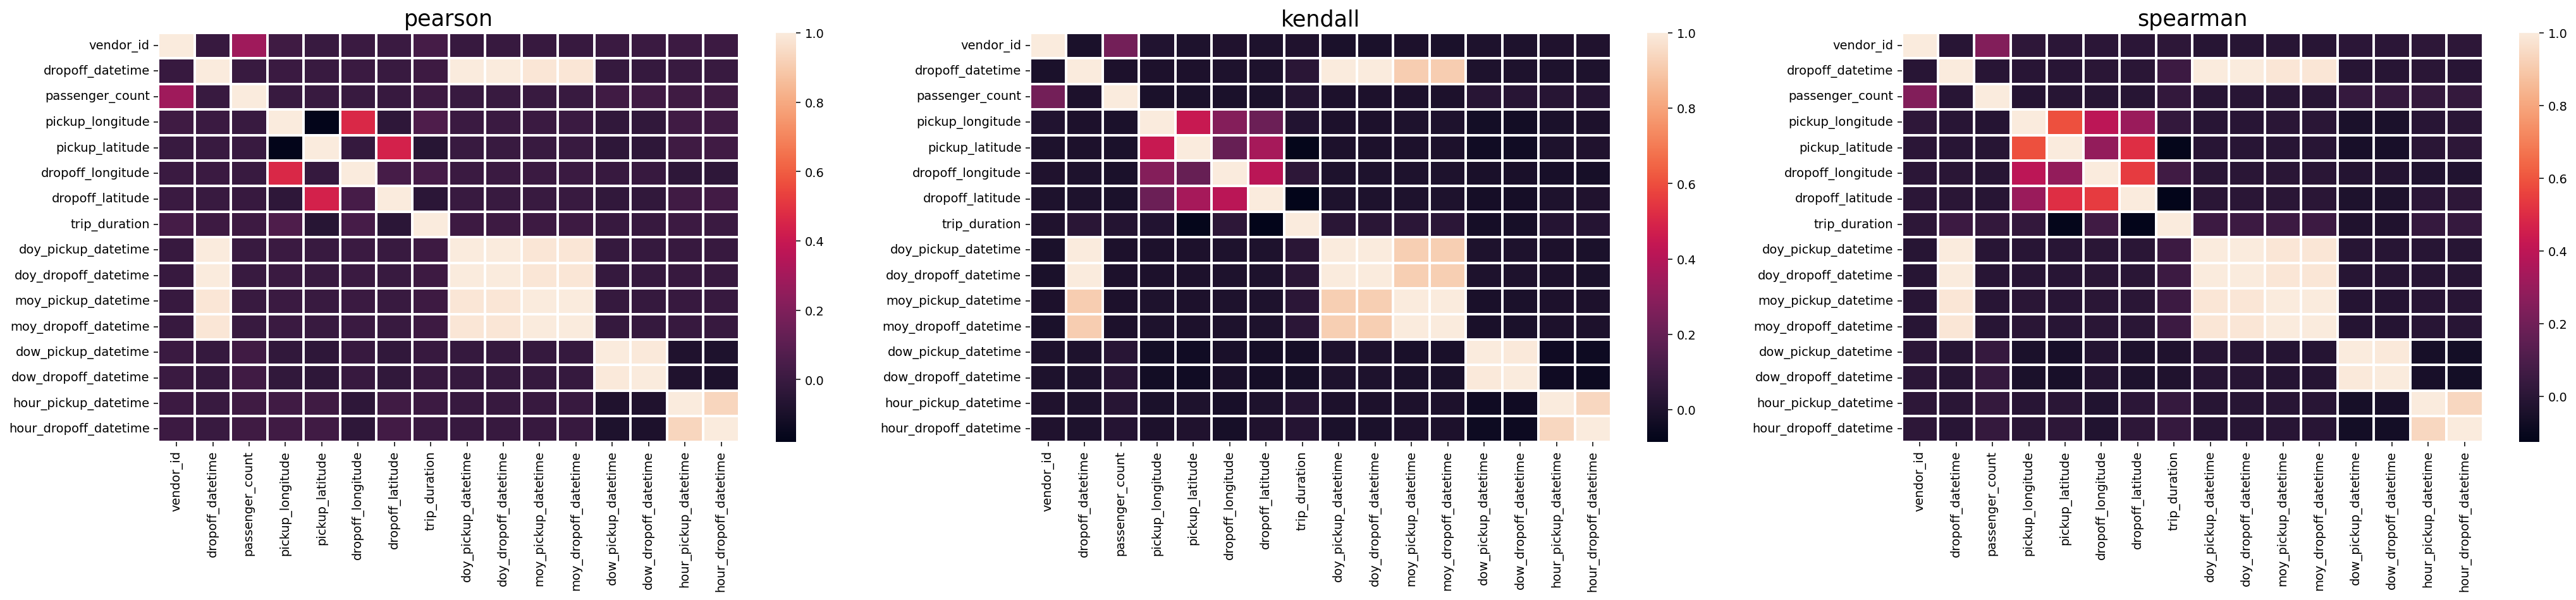

In [330]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [333]:
# extracting transaction information of current and previous months
var = []
var.extend(pickup)
var.extend(dropoff)

KeyError: "['pickup_month_name', 'pickup_day_of_week', 'pickup_time_of_day'] not in index"

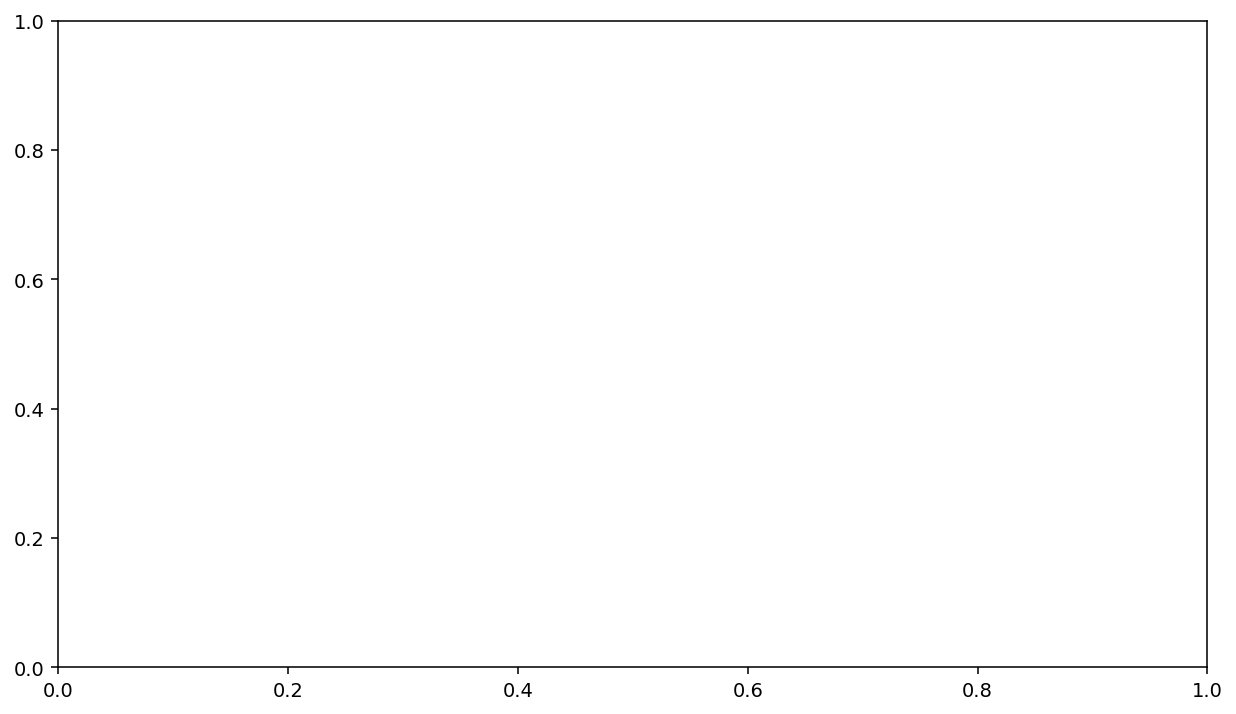

In [334]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)